In [5]:
import os
import sys
import shutil
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as Pilim
from IPython.display import Image 
%matplotlib inline
%load_ext autoreload 
%autoreload
from pathlib import Path
import fastai
fastai.__version__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'1.0.61'

In [6]:
%config Completer.use_jedi = False

In [49]:
path_img = os.path.normpath('C:/Users/Fredrik Mathisen/Documents/predspicks/with_text/')
out_path = os.path.normpath('C:/Users/Fredrik Mathisen/Documents/predspicks/output/images')

In [8]:
annot = pd.read_csv('C:/Users/Fredrik Mathisen/Documents/predspicks/boundingBoxes.csv')

In [9]:
annot.head()

,filename,filename_source,height,imageheight,imagewidth,name,width,x,xmax,xmin,y,ymax,ymin
0,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,7,1024,1024,y9f c3d_,36,55,91,19,33,40,26
1,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,5,1024,1024,Sx,8,28,36,20,48,53,43
2,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,6,1024,1024,uAY.aKcFPzröxg3T]v,80,824,904,744,31,38,25
3,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,5,1024,1024,8ckO.f,26,760,786,734,46,51,41
4,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,6,1024,1024,ø]UUUüKD5O 8,53,787,841,734,64,70,58


In [10]:
def get_bbox(fn):
    bbox = annot.loc[annot.filename == fn][['xmin', 'ymin', 'xmax', 'ymax']]
    return np.array(bbox)

In [11]:
annot['bbox'] = annot['filename'].apply(get_bbox)
annot.head()

,filename,filename_source,height,imageheight,imagewidth,name,width,x,xmax,xmin,y,ymax,ymin,bbox
0,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,7,1024,1024,y9f c3d_,36,55,91,19,33,40,26,"[[19, 26, 91, 40], [20, 43, 36, 53], [744, 25,..."
1,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,5,1024,1024,Sx,8,28,36,20,48,53,43,"[[19, 26, 91, 40], [20, 43, 36, 53], [744, 25,..."
2,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,6,1024,1024,uAY.aKcFPzröxg3T]v,80,824,904,744,31,38,25,"[[19, 26, 91, 40], [20, 43, 36, 53], [744, 25,..."
3,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,5,1024,1024,8ckO.f,26,760,786,734,46,51,41,"[[19, 26, 91, 40], [20, 43, 36, 53], [744, 25,..."
4,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,6,1024,1024,ø]UUUüKD5O 8,53,787,841,734,64,70,58,"[[19, 26, 91, 40], [20, 43, 36, 53], [744, 25,..."


In [12]:
data_df = annot.drop_duplicates(subset='filename', ignore_index=True)

In [13]:
data_df.head()

,filename,filename_source,height,imageheight,imagewidth,name,width,x,xmax,xmin,y,ymax,ymin,bbox
0,00000019.png,06cc46b7-50b1-41c1-a406-ccac7a5ac3e2.dcm,7,1024,1024,y9f c3d_,36,55,91,19,33,40,26,"[[19, 26, 91, 40], [20, 43, 36, 53], [744, 25,..."
1,00000011.png,0716e0cf-3822-406e-bfb2-c064cd471019.dcm,5,1024,1024,KuM b0 k4eqa_F Wnls,65,84,150,19,30,36,25,"[[19, 25, 150, 36], [19, 41, 108, 49], [730, 2..."
2,00000013.png,0cea4fac-4e84-4857-ac38-f2eb0dacfffc.dcm,3,1024,1024,6Yvz,13,32,45,19,27,31,24,"[[19, 24, 45, 31], [732, 32, 758, 40], [733, 4..."
3,00000012.png,14f630ba-5e88-4944-9040-9861c91dc362.dcm,7,1024,1024,9VwvåsM it]a0ö(t8 3,93,107,201,14,25,33,18,"[[14, 18, 201, 33], [14, 39, 131, 53], [14, 58..."
4,00000015.png,33ef7198-c976-4bb9-82ba-9ed9a73350ac.dcm,6,1024,1024,GDB g,21,41,63,20,25,32,19,"[[20, 19, 63, 32], [21, 39, 73, 52], [20, 60, ..."


In [30]:
def format_bbox():
    final_list=[]
    label_list=[]
    bbox_list=data_df.bbox
    for i in range(len(bbox_list)):
        e = bbox_list[i].tolist()
        l = len(bbox_list[i])
        n = np.repeat('',l).tolist()
        final_list.append(tuple((e,n)))
        #label_list.append(n) 
        
    return final_list

In [37]:
bbox = data_df.loc[data_df.filename == '00000001.png'].bbox.values
bbox = listify(bbox)
bbox = format_bbox()
bbox[1][0]

In [40]:
bbox = [[19, 25, 150, 36],
 [19, 41, 108, 49],
 [730, 29, 777, 36],
 [730, 40, 805, 50],
 [31, 982, 64, 991],
 [30, 966, 127, 977],
 [30, 953, 84, 962],
 [37, 937, 91, 946],
 [737, 985, 763, 992],
 [746, 978, 747, 979],
 [737, 958, 826, 967],
 [744, 945, 792, 955],
 [738, 932, 847, 942],
 [509, 366, 521, 373]]

In [41]:
test = Path(path_img)
test

WindowsPath('C:/Users/Fredrik Mathisen/Documents/predspicks/with_text')

In [46]:
img2bbox = dict(zip('00000001.png', bbox))
img2bbox

{'0': [30, 953, 84, 962],
 '1': [37, 937, 91, 946],
 '.': [737, 985, 763, 992],
 'p': [746, 978, 747, 979],
 'n': [737, 958, 826, 967],
 'g': [744, 945, 792, 955]}

In [45]:
img = open_image(str(test) + '/00000001.png')
img_bbox = ImageBBox.create(*img.size, img2bbox)

KeyError: 0

AttributeError: 'list' object has no attribute 'show'

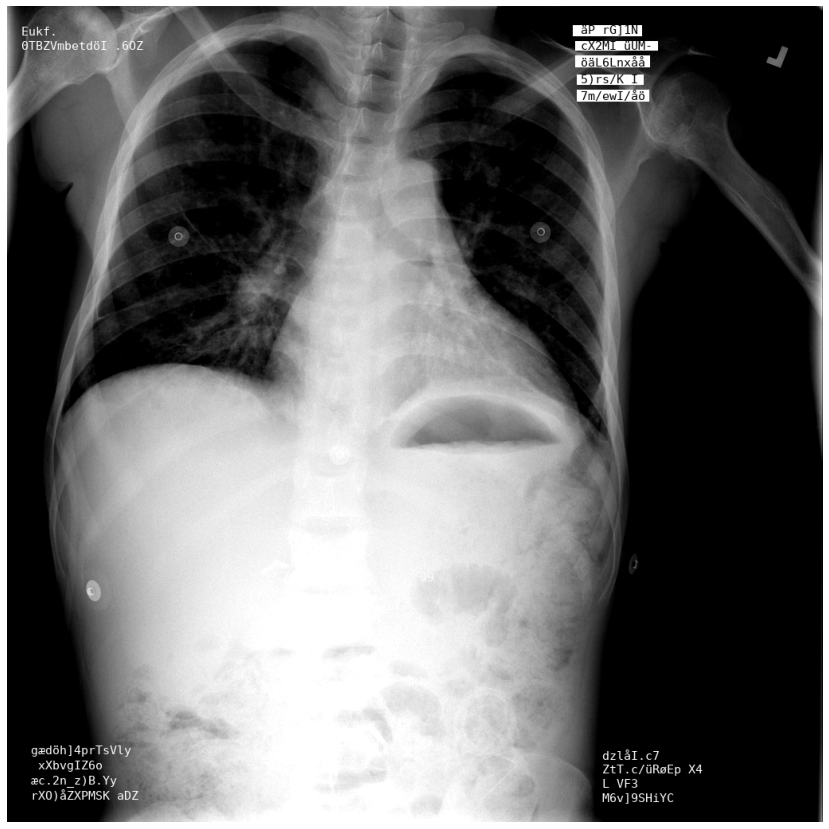

In [43]:
img.show(figsize=(15,15),y=bbox)

[array([array([[  19,   26,   59,   36],
        [  18,   44,  170,   54],
        [ 720,   24,  791,   36],
        [ 721,   44,  807,   54],
        [ 721,   63,  799,   75],
        [ 721,   86,  790,   98],
        [ 721,  105,  799,  118],
        [  32,  983,  164,  997],
        [  30,  966,  137,  980],
        [  39,  947,  118,  960],
        [  30,  928,  155,  941],
        [ 747,  988,  835, 1000],
        [ 748,  970,  790,  980],
        [ 748,  952,  872,  965],
        [ 747,  933,  817,  945],
        [ 519,  711,  535,  721]], dtype=int64)], dtype=object)]

In [89]:
def split_bbox(bbox):
    bbox1,bbox2=[],[]
    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]
    if (x1<=256 and x2>256):
        bbox1 = [x1, y1, 256, y2]
        bbox2 = [0, y1, x2-256, y2]
    return bbox1,bbox2
    
    
#def create_offset(bboxes):
    

In [90]:
bla = [220, 5, 360, 15]
print(split_bbox(bla))

([220, 5, 256, 15], [0, 5, 104, 15])


In [57]:
output_image_list = glob.glob(str(out_path) + '/*.png')

In [58]:
output_image_list

['C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00000.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00001.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00002.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00003.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00004.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00005.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00006.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00007.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00008.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00009.png',
 'C:\\Users\\Fredrik Mathisen\\Documents\\predspicks\\output\\images\\00000000_00010.png',